# Tests théoriques pour le transfer learning en régression linéaire

In [2]:
# Libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Scripts
import utils
from LinearRegressionTL import LinearRegressionTL
import data_enriched_functions as enriched

## Test pour n=3, N=4 et d=2

In [3]:
# Création de valeurs tests
X_s = np.array([[1, 3], [2, 2], [1, 1]])
X_b = np.array([[1, 2], [0, 2], [3, 2], [3, 0]])
X_t = X_s

beta = np.array([3, 3])
gamma = np.array([1, 2])

d = 2
n = 3
N = 4

sigma_s2 = 0.1
sigma_b2 = 0.2
Y_s = X_s@beta + np.random.normal(0, sigma_s2, n)
Y_b = X_b@(beta+gamma) + np.random.normal(0, sigma_b2, N)
print("Y_s=", Y_s)
print("Y_b=", Y_b)


# Entraînement
model_reg_lin_TL = LinearRegressionTL(d, method="plug")
beta_hat = model_reg_lin_TL.fit(X_s, Y_s, X_b, Y_b)

# Prédiction
print("beta_hat=", beta_hat)
print("gamma_hat=", model_reg_lin_TL.gamma_hat)
print("pred=", model_reg_lin_TL.predict(X_s))

# EQM
print("eqm_theorique=", np.mean((beta_hat - beta)**2))

Y_s= [12.05355273 12.00200996  6.05747511]
Y_b= [13.57735536  9.61985749 21.94534059 12.14975248]
beta_hat= [2.99851611 3.03181098]
gamma_hat= [1.08193005 1.78739725]
pred= [12.09394905 12.06065418  6.03032709]
eqm_theorique= 0.0005070701727161868


## Test pour n=1000, N=10,000 et d=4

In [33]:
d = 4
n = 10
N = 10000
# Création de valeurs tests
#intercept_column_s = np.ones(n)
#intercept_column_b = np.ones(N)

C_s, C_b = utils.generate_covariance_matrix(d+1, method="wishart")



# Génération de X_s
X_s = np.vstack([np.random.multivariate_normal(mean=np.zeros(d), cov=C_s) for _ in range(n)])
#X_s = np.hstack((X_s, intercept_column_s.reshape(-1, 1)))

# Génération de X_b
X_b = np.vstack([np.random.multivariate_normal(mean=np.zeros(d), cov=C_b) for _ in range(N)])
#X_b = np.hstack((X_b, intercept_column_b.reshape(-1, 1)))
print("X_s=", X_s.shape)
print("X_b=", X_b.shape)

beta = np.zeros(d)+2
#beta = np.array(range(1,d+1))
print("beta_origin=", beta)
scale_factor = 1
gamma = np.random.uniform(low=-1, high=1, size=d)*scale_factor
print("gamma_origin=", gamma)

sigma_s2 = 1
sigma_b2 = 2
Y_s = X_s@beta + np.random.normal(0, sigma_s2, n)
Y_b = X_b@(beta+gamma) + np.random.normal(0, sigma_b2, N)
print("Y_s=", Y_s.shape)
print("Y_b=", Y_b.shape)

"""
# Découpage de X_s et Y_s pour train et test
X_s_train = X_s[X_s.shape[0]*0.80,:]
X_s_test = X_s[X_s.shape[0]*0.20,:]
print("X_s_train=", X_s_train.shape)
print("X_s_test=", X_s_test.shape)
Y_s_train = Y_s[Y_s.shape[0]*0.80,:]
Y_s_test = Y_s[Y_s.shape[0]*0.20,:]
print("Y_s_train=", Y_s_train.shape)
print("Y_s_test=", Y_s_test.shape)
"""

X_s= (10, 4)
X_b= (10000, 4)
beta_origin= [2. 2. 2. 2.]
gamma_origin= [-0.06611995 -0.41406646  0.59803291 -0.22452186]
Y_s= (10,)
Y_b= (10000,)


'\n# Découpage de X_s et Y_s pour train et test\nX_s_train = X_s[X_s.shape[0]*0.80,:]\nX_s_test = X_s[X_s.shape[0]*0.20,:]\nprint("X_s_train=", X_s_train.shape)\nprint("X_s_test=", X_s_test.shape)\nY_s_train = Y_s[Y_s.shape[0]*0.80,:]\nY_s_test = Y_s[Y_s.shape[0]*0.20,:]\nprint("Y_s_train=", Y_s_train.shape)\nprint("Y_s_test=", Y_s_test.shape)\n'

In [34]:
# Entraînement
model_reg_lin_TL = LinearRegressionTL(d, method="plug")
beta_hat = model_reg_lin_TL.fit(X_s, Y_s, X_b, Y_b)

# Prédiction
print("beta_hat=", beta_hat)
print("gamma_hat=", model_reg_lin_TL.gamma_hat)
Y_pred = model_reg_lin_TL.predict(X_s)

beta_hat= [4.23621661 2.0530571  0.5845978  4.71068666]
gamma_hat= [-2.2778211  -0.47846437  2.00026756 -2.96050551]


In [35]:
model_reg_lin = LinearRegression()
model_reg_lin.fit(X_s, Y_s)

beta_hat_classique = model_reg_lin.coef_
print("beta_hat_classique=", beta_hat_classique)
Y_pred_classique = model_reg_lin.predict(X_s)

beta_hat_classique= [4.20122838 2.05125588 0.65932909 4.57836698]


In [36]:
print("MSE_beta =", np.mean((beta - beta_hat)**2))
print("MSE_beta_classique =",np.mean((beta - beta_hat_classique)**2))

print("Relative_bias =", utils.return_rb_gamma(n, gamma))

MSE_beta = 3.5886663358939908
MSE_beta_classique = 3.323352070056275
Relative_bias = 4.119629341786993


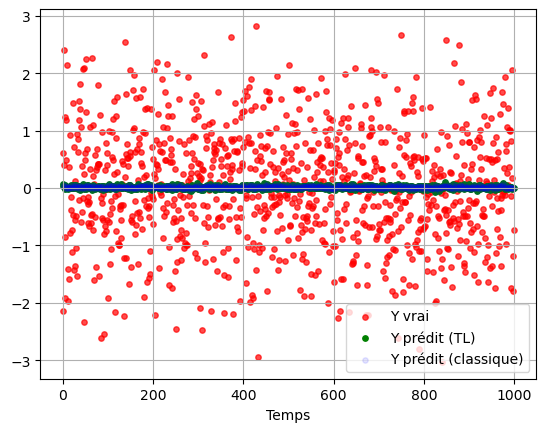

----- Erreur d'entraînement :
MSE_Y = 0.9978890587296807


In [39]:
# Tracé sur la prédcition de Y_s
x_abs = range(n)
plt.scatter(x_abs, Y_s, color='red',label='Y vrai', s=15, alpha=0.7)
plt.scatter(x_abs, Y_pred, color='green',label='Y prédit (TL)', s=15)
plt.scatter(x_abs, Y_pred_classique, color='blue',label='Y prédit (classique)', s=15, alpha=0.1)
plt.xlabel('Temps')
plt.ylabel('')
plt.grid()
plt.legend()
plt.show()

print("----- Erreur d'entraînement :")
print("MSE_Y =", np.mean((Y_s - Y_pred)**2))

iter n° 0


iter n° 1
iter n° 2
iter n° 3
iter n° 4
iter n° 5
iter n° 6
iter n° 7
iter n° 8
iter n° 9
iter n° 10
iter n° 11
iter n° 12
iter n° 13
iter n° 14
iter n° 15
iter n° 16
iter n° 17
iter n° 18
iter n° 19
iter n° 20
iter n° 21
iter n° 22
iter n° 23
iter n° 24
iter n° 25
iter n° 26
iter n° 27
iter n° 28
iter n° 29
iter n° 30
iter n° 31
iter n° 32
iter n° 33
iter n° 34
iter n° 35
iter n° 36
iter n° 37
iter n° 38
iter n° 39
iter n° 40
iter n° 41
iter n° 42
iter n° 43
iter n° 44
iter n° 45
iter n° 46
iter n° 47
iter n° 48
iter n° 49
iter n° 50
iter n° 51
iter n° 52
iter n° 53
iter n° 54
iter n° 55
iter n° 56
iter n° 57
iter n° 58
iter n° 59
iter n° 60
iter n° 61
iter n° 62
iter n° 63
iter n° 64
iter n° 65
iter n° 66
iter n° 67
iter n° 68
iter n° 69
iter n° 70
iter n° 71
iter n° 72
iter n° 73
iter n° 74
iter n° 75
iter n° 76
iter n° 77
iter n° 78
iter n° 79
iter n° 80
iter n° 81
iter n° 82
iter n° 83
iter n° 84
iter n° 85
iter n° 86
iter n° 87
iter n° 88
iter n° 89
iter n° 90
iter n° 91
iter n° 

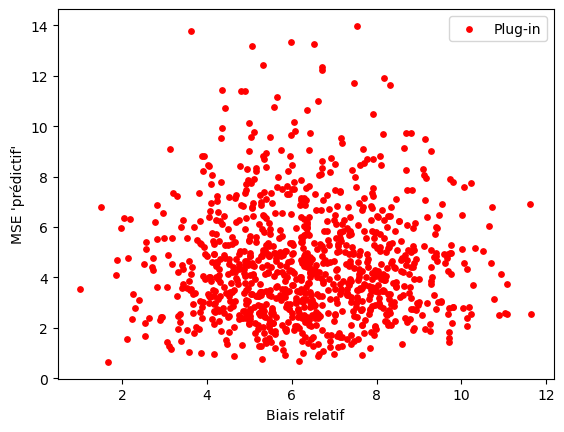

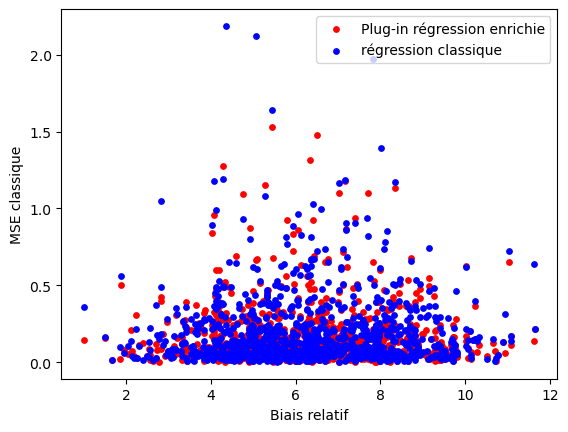

MSE_enrichie_moy= 0.15743385276936736
MSE_classic_moy= 0.19182773174913004


In [3]:
d = 4
n = 10
N = 10000
scale_factor = 1
# Création de valeurs tests
intercept_column_s = np.ones(n)
intercept_column_b = np.ones(N)

l_rb = []
l_pmse = []
l_vmse = []
l_vmse_classic = []
# nb_iter = 100  -> ~7min  (wishart)
# nb_iter = 1000 -> ~90min (wishart)
# nb_iter = 1000 -> ~50min (spiked)
nb_iter = 1000


for iter in range(nb_iter):
    print("iter n°", iter)
    beta = np.zeros(d)+2
    gamma = np.random.uniform(low=-1, high=1, size=d)*scale_factor
    sigma_s2 = 1
    sigma_b2 = 2
    
    C_s, C_b = utils.generate_covariance_matrix(d+1, method="spiked")

    # Génération de X_s
    X_s = np.vstack([np.random.multivariate_normal(mean=np.zeros(d), cov=C_s) for _ in range(n)])
    #X_s = np.hstack((X_s, intercept_column_s.reshape(-1, 1)))

    # Génération de X_b
    X_b = np.vstack([np.random.multivariate_normal(mean=np.zeros(d), cov=C_b) for _ in range(N)])
    #X_b = np.hstack((X_b, intercept_column_b.reshape(-1, 1)))

    Y_s = X_s@beta + np.random.normal(0, sigma_s2, n)
    Y_b = X_b@(beta+gamma) + np.random.normal(0, sigma_b2, N)
    
    model_reg_lin_TL = LinearRegressionTL(d, method="plug")
    beta_hat = model_reg_lin_TL.fit(X_s, Y_s, X_b, Y_b)
    
    model_reg_lin_classic = LinearRegression()
    model_reg_lin_classic.fit(X_s, Y_s)
    beta_hat_classic = model_reg_lin_classic.coef_

    
    relative_bias = utils.return_rb_gamma(n, gamma)
    pmse = enriched.compute_EQM(model_reg_lin_TL.lamda,
                                model_reg_lin_TL.sigma2_s_hat,
                                model_reg_lin_TL.sigma2_b_hat,
                                model_reg_lin_TL.eigenvals,
                                X_s,
                                X_b,
                                X_s,
                                model_reg_lin_TL.beta_hat_s,
                                model_reg_lin_TL.beta_hat_b,
                                model_reg_lin_TL.U,
                                d)
    vmse_enriched = np.mean((beta - beta_hat)**2)
    vmse_classic = np.mean((beta - beta_hat_classic)**2)
    
    l_rb.append(relative_bias)
    l_pmse.append(pmse)
    l_vmse.append(vmse_enriched)
    l_vmse_classic.append(vmse_classic)

plt.scatter(l_rb, l_pmse, color='red',label='Plug-in', s=15)
plt.xlabel("Biais relatif")
plt.ylabel("MSE 'prédictif'")
plt.legend()
plt.show()    

plt.scatter(l_rb, l_vmse, color='red',label='Plug-in régression enrichie', s=15)
plt.scatter(l_rb, l_vmse_classic, color='blue',label='régression classique', s=15)
plt.xlabel("Biais relatif")
plt.ylabel("MSE classique")
plt.legend()
plt.show()

print("MSE_enrichie_moy=", np.mean(l_vmse))
print("MSE_classic_moy=", np.mean(l_vmse_classic))
    
    